# Movie Recommendation System: Data Analysis and Preprocessing

The purpose of this project is to analyze movie data and build a recommendation system. We aim to understand relationships between different movie features, such as budget, ratings, and genres, and use this information to suggest similar movies to users.


In [2]:
#import library need 
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Goals:
Conduct Exploratory Data Analysis (EDA) to understand the relationships between various features. 


Analyze how budget impacts ratings.


Identify genres with the highest average ratings.


Build a content-based recommendation system using movie descriptions and genres.


Provide movie recommendations based on user input.

## Step 2: Load Datasets

In [3]:
# save datasets in data fram
df_movies=pd.read_csv("tmdb_5000_movies.csv")
df_credits=pd.read_csv("tmdb_5000_credits.csv")

In [4]:
# Preview the first few rows of each dataset
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## QUESTIONS PART 
# 1- Is the rating effective by budget?


# 2- what is the most genre have rating?


## Step 3: Preprocess the Data

### 3.1 Check for Missing Values and Duplicates


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df_movies.duplicated().sum()

0

## as you see the dataset has some missed values but the missing value is not important in our (EDA)

## Step 4: Exploratory Data Analysis (EDA)

### 4.1 Analysis of Ratings vs. Budget

We want to determine if higher budgets result in better ratings.

In [7]:
df_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
df_movies_rb=df_movies[['budget','vote_average','vote_count']]

In [9]:
df_movies_rb.head()

,budget,vote_average,vote_count
0,237000000,7.2,11800
1,300000000,6.9,4500
2,245000000,6.3,4466
3,250000000,7.6,9106
4,260000000,6.1,2124


In [10]:
df_movies_rb[(df_movies_rb['vote_count']<500) & (df_movies_rb['vote_average']>8)]

,budget,vote_average,vote_count
2386,0,9.3,2
2796,0,8.4,11
2947,10000000,8.2,12
2970,10500000,8.5,2
3041,10000000,8.1,12
3519,0,10.0,1
3723,0,8.2,68
3788,4000000,8.1,18
3906,3000000,8.1,483
3992,0,9.5,2


know we will compare but before doing it there are two cases we should include the number of vote_count should be at least 500 why because is unfair to the comparison between two movies one with a number of votes of 1 and a score of 10 and the other with the number of votes 1000 with score 8  and the budget over 0 why 
because the 0 means the company doesn't announce budget of movie.


In [11]:
df_comparison=df_movies_rb[(df_movies_rb['vote_count']>=500) & (df_movies_rb['budget']>0)]

In [12]:
df_comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 4796
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1588 non-null   int64  
 1   vote_average  1588 non-null   float64
 2   vote_count    1588 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 49.6 KB


as you see the number of entries is less than before but is more accurate than the previous and the samples is good know to do the comparison 

### 4.2 Scatter Plot: Relationship Between Ratings and Budget


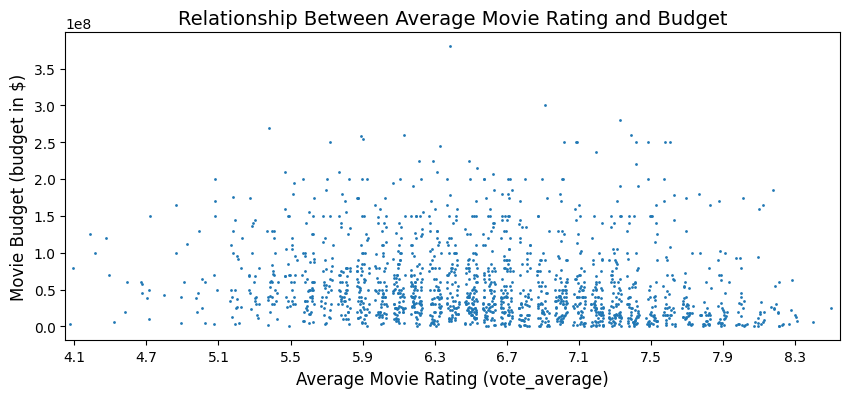

In [13]:
# Adjust figure size for better clarity
plt.figure(figsize=(10, 4))



sns.stripplot(data=df_comparison, x='vote_average', y='budget', size=2, jitter=0.35)

# Improve axis labels and title with more descriptive text and larger font sizes
plt.xlabel('Average Movie Rating (vote_average)', fontsize=12)
plt.ylabel('Movie Budget (budget in $)', fontsize=12)
plt.title('Relationship Between Average Movie Rating and Budget', fontsize=14)
pos, lab = plt.xticks()
plt.xticks(pos[::4], lab[::4])
plt.show()

In [14]:
df_comparison['vote_average'].corr(df_comparison['budget'])

-0.16893829435779936

Correlation Coefficient:  The correlation between budget and rating is -0.168, indicating a slight negative relationship. Higher-budget movies tend to have slightly lower ratings.


### 4.3 Analysis of Ratings by Genre

We analyze which genres tend to have higher average ratings.

In [15]:
import ast
df=df_movies.copy()
# Convert the JSON-like strings into lists of dictionaries
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))

# Extract the genre names into a new column
df['genre_names'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

# Display the DataFrame
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


### 4.4 Analysis of Genre vs. Budget and Rating

In [16]:
df_exploded = df.explode('genre_names')
df_exploded.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure


In [17]:
df_cost_genre=df_exploded[['budget','genre_names']]

df_cost_genre=df_cost_genre[(df_cost_genre['budget']>0)]

df_cost_genre.head(10)

,budget,genre_names
0,237000000,Action
0,237000000,Adventure
0,237000000,Fantasy
0,237000000,Science Fiction
1,300000000,Adventure
1,300000000,Fantasy
1,300000000,Action
2,245000000,Action
2,245000000,Adventure
2,245000000,Crime


In [18]:
df_cost_genre.groupby('genre_names').mean().sort_values(by='budget', ascending=False)

,budget
genre_names,
Animation,7.477414e+07
Adventure,7.287652e+07
Fantasy,7.110738e+07
Family,6.346124e+07
Action,5.856493e+07
Science Fiction,5.841699e+07
War,3.848995e+07
Thriller,3.795666e+07
Mystery,3.602384e+07


In [19]:
df_vote_genre=df_exploded[['vote_average','vote_count','genre_names']]

df_vote_genre=df_vote_genre[(df_vote_genre['vote_count']>=500)]

df_vote_genre.head()

,vote_average,vote_count,genre_names
0,7.2,11800,Action
0,7.2,11800,Adventure
0,7.2,11800,Fantasy
0,7.2,11800,Science Fiction
1,6.9,4500,Adventure


In [20]:
# Group by 'genre_names' and aggregate 'vote_average' with the mean and 'vote_count' with the count
df_aggregated = df_vote_genre.groupby('genre_names').agg({'vote_average': 'mean', 'vote_count': 'sum'})

# Sort the resulting DataFrame by 'vote_average' in descending order
df_aggregated.sort_values(by='vote_average', ascending=False)


,vote_average,vote_count
genre_names,,
War,7.132759,97227
History,7.124561,77619
Western,7.042857,41875
Drama,6.951057,998942
Music,6.785366,40236
Animation,6.723846,274395
Romance,6.688085,317762
Crime,6.687361,448570
Mystery,6.646763,237412


### Highest Rated Genres:
Drama and Action genres have higher average ratings among movies with at least 500 votes.
Other well-rated genres include Adventure and Mystery.

# 5-bulid recomandations

In [21]:
df_credits.columns = ['id','tittle','cast','crew']
df = df_movies.merge(df_credits,on='id')

In [22]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We got the matrix of vectors with plot. Now to compute a similarity score we use cosine similarity.There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

Cosine similarity

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.


In [23]:
# Import linear_kernel from sklearn
from sklearn.metrics.pairwise import linear_kernel

#Compute cosine similarity using tfidf_matrix
cosine_sim = linear_kernel(tfidf_matrix , tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [24]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [25]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [26]:
get_recommendations('The Dark Knight Rises')


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [27]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast','crew','keywords','genres']

for i in features:
    df[i] = df[i].apply(literal_eval)


In [29]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(n):
    for i in n:
        if i['job'] == 'Director':
            return i['name']
    return num.nan

In [30]:
#Function for getting top 3 elements from the list
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []


In [31]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df['director'] = df['crew'].apply(get_director)
features = ['cast','keywords','genres']
for i in features:
    df[i] = df[i].apply(get_list)

In [32]:
#Print the new features
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [33]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''


In [34]:
#Applying clean data function

features = ['cast','keywords','genres','director']

for i in features:
    df[i] = df[i].apply(clean_data)

In [35]:
def create_soup(x):
    return ' '.join(x['keywords'])+' '+' '.join(x['cast'])+' '+' '.join(x['director'])+' '+' '.join(x['genres'])
df['soup'] = df.apply(create_soup,axis = 1)


In [36]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
cv_matrix = count.fit_transform(df['soup'])

In [37]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(cv_matrix,cv_matrix)


In [38]:
indices = pd.Series(df.index,index=df['title'])

In [39]:
#Now we can use get_recommendations with cosine_sim2 for metadata based recommender
get_recommendations('The Avengers',cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

In [43]:
from sklearn.metrics import precision_score, recall_score

def evaluate_recommendations(model, test_set, top_n=10):
    """
    Evaluate the precision and recall of the recommendation system.

    Parameters:
        model: Function to generate recommendations (like `get_recommendations`).
        test_set: List of tuples (user_id, true_movies) where true_movies are the movies the user liked.
        top_n: Number of recommendations to consider.

    Returns:
        Precision and recall values.
    """
    y_true = []
    y_pred = []

    for user, true_movies in test_set:
        # Get recommendations
        recommended_movies = model(user)

        # Convert to sets for comparison
        true_set = set(true_movies)
        recommended_set = set(recommended_movies[:top_n])

        # Populate true/false labels
        y_true.extend([1] * len(true_set))
        y_true.extend([0] * (len(recommended_set) - len(true_set)))

        y_pred.extend([1 if movie in true_set else 0 for movie in recommended_set])

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)

    return precision, recall

# Example usage:
test_data = [
    ("The Dark Knight Rises", ["The Dark Knight", "Inception", "Batman Begins"]),
    ("The Avengers", ["Iron Man", "Captain America: Civil War"]),
]
precision, recall = evaluate_recommendations(get_recommendations, test_data)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")


Precision: 0.50, Recall: 0.20


# 6-Conclusion
## Summary of Findings:

Higher-budget movies have a slight tendency towards lower ratings, as indicated by the negative correlation.


Drama and Action are among the highest-rated genres based on user votes.


The recommendation system uses content-based filtering and is capable of suggesting similar movies based on genres and descriptions.


## Future Work:

Improve the recommendation model by incorporating collaborative filtering methods.


Evaluate the model's performance using metrics like RMSE, Precision, and Recall.


Deploy the model using a web framework like Flask or Streamlit for user interaction.
